In [108]:
import numpy as np
import tifffile
from glob import glob
import napari
import matplotlib.pyplot as plt
from skimage.measure import label
from skimage.measure import regionprops_table
import pandas as pd
from sklearn.metrics import jaccard_score, precision_score, recall_score
import seaborn as sns

In [109]:
morphologies_stationary = pd.read_pickle("morphologies_stationary.pickle")
morphologies_exponential = pd.read_pickle("morphologies_exponential.pickle")
morphologies_stationary["Phase"] = "Stationary"
morphologies_exponential["Phase"] = "Exponential"
morphologies = pd.DataFrame()
morphologies = morphologies.append(morphologies_exponential)
morphologies = morphologies.append(morphologies_stationary)
morphologies.reset_index(inplace=True,drop=True)

Text(0.5, 0, '')

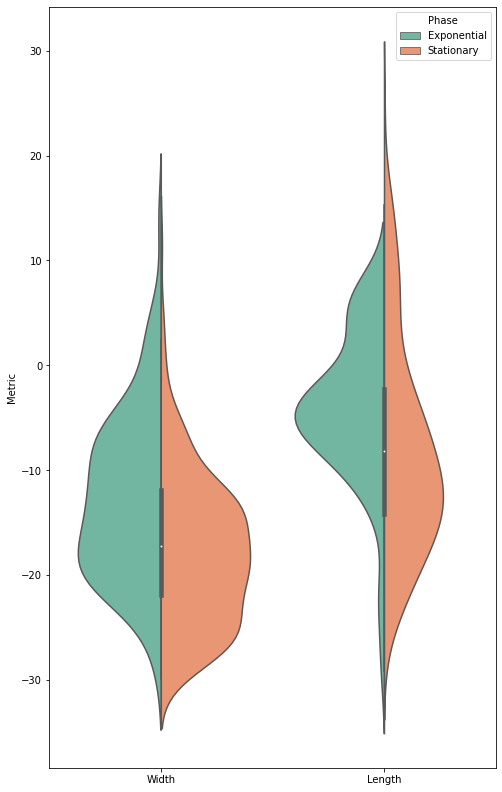

In [110]:
plt.figure(figsize=(8,14))
sns.violinplot(data=morphologies,x="Error",y="Value",hue="Phase",split=True,inner="box",dodge=True,palette="Set2")
plt.ylabel("Metric")
plt.xlabel("")

In [111]:
metrics_stationary

,Metric,Value,Phase
0,Recall,0.722757,Stationary
1,Recall,0.677388,Stationary
2,Recall,0.629789,Stationary
3,Recall,0.684381,Stationary
4,Recall,0.680583,Stationary
...,...,...,...
85,IoU,0.733925,Stationary
86,IoU,0.740350,Stationary
87,IoU,0.750292,Stationary
88,IoU,0.688435,Stationary


In [112]:
metrics_stationary = pd.read_pickle("metrics_stationary.pickle")
metrics_exponential = pd.read_pickle("metrics_exponential.pickle")
metrics_stationary["Phase"] = "Stationary"
metrics_exponential["Phase"] = "Exponential"
metrics = pd.DataFrame()
metrics = metrics.append(metrics_exponential)
metrics = metrics.append(metrics_stationary)
metrics.reset_index(inplace=True,drop=True)

In [124]:
metrics = metrics[metrics["Metric"]=="IoU"]

In [113]:
metrics["measurement"] = "Accuracy Metrics"
morphologies["measurement"] = "Morphology Error"
all_data = pd.DataFrame()
all_data = all_data.append(metrics)
all_data = all_data.append(morphologies)
all_data.reset_index(inplace=True,drop=True)

In [114]:
all_data

,Metric,Value,Phase,measurement,Error
0,Recall,0.852556,Exponential,Accuracy Metrics,NaN
1,Recall,0.821156,Exponential,Accuracy Metrics,NaN
2,Recall,0.817811,Exponential,Accuracy Metrics,NaN
3,Recall,0.886986,Exponential,Accuracy Metrics,NaN
4,Recall,0.797898,Exponential,Accuracy Metrics,NaN
...,...,...,...,...,...
882,NaN,-16.079945,Stationary,Morphology Error,Length
883,NaN,-8.664473,Stationary,Morphology Error,Length
884,NaN,-13.265979,Stationary,Morphology Error,Length
885,NaN,10.616355,Stationary,Morphology Error,Length


Text(0.5, 0, '')

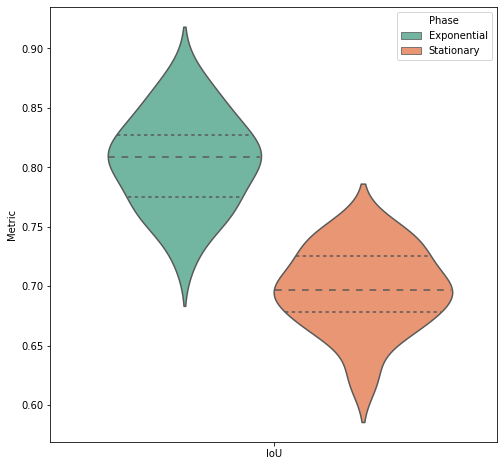

In [126]:
plt.figure(figsize=(8,8))
sns.violinplot(data=metrics,x="Metric",y="Value",hue="Phase",split=False,inner="quartile",palette="Set2")
plt.ylabel("Metric")
plt.xlabel("")

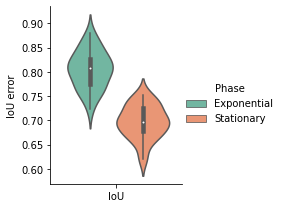

In [136]:
g = sns.catplot(x="Metric",y="Value", hue="Phase",data=metrics,
                kind="violin",
                height=3, aspect=0.9,dodge=True,palette="Set2");
g.axes[0][0].set_xlabel("")
g.axes[0][0].set_ylabel("IoU error")
plt.savefig("IoU_errors.pdf")

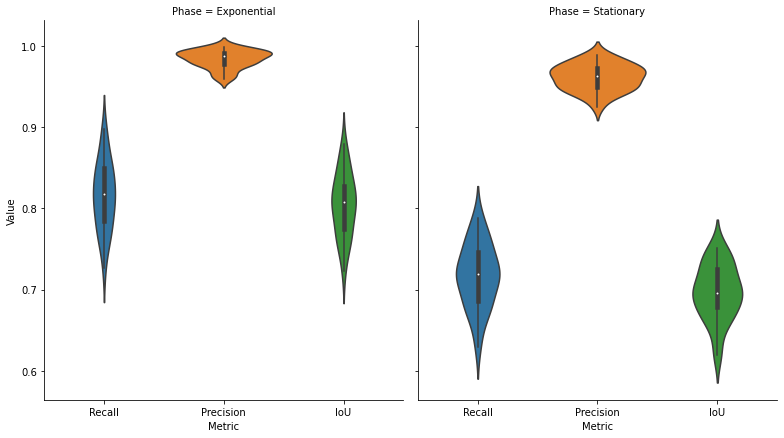

In [116]:
g = sns.catplot(x="Metric",y="Value", col="Phase",data=metrics,
                kind="violin", split=True,
                height=6, aspect=.9);

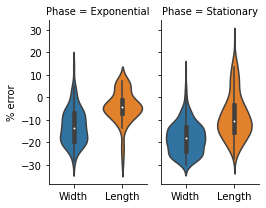

In [118]:
g = sns.catplot(x="Error",y="Value", col="Phase",data=morphologies,
                kind="violin",
                height=3, aspect=.6,dodge=False);
g.axes[0][0].set_xlabel("")
g.axes[0][1].set_xlabel("")
g.axes[0][0].set_ylabel("% error")
plt.savefig("morph_errors.pdf")

In [137]:
morphologies

,Error,Value,Phase,measurement
0,Width,-15.812295,Exponential,Morphology Error
1,Width,-13.717067,Exponential,Morphology Error
2,Width,-5.941493,Exponential,Morphology Error
3,Width,-11.256208,Exponential,Morphology Error
4,Width,-12.624732,Exponential,Morphology Error
...,...,...,...,...
702,Length,-16.079945,Stationary,Morphology Error
703,Length,-8.664473,Stationary,Morphology Error
704,Length,-13.265979,Stationary,Morphology Error
705,Length,10.616355,Stationary,Morphology Error


In [210]:
times = ({"Human, 100x": 20,
"Human, 100x": 100,
"SyMBac, 100x": 100/60,
          "Human, 10,000x": 100*100,
         "SyMBac, 10,000x": 100/60*100})
times = pd.DataFrame.from_dict(times,columns=["time"],orient="index")
times.reset_index(inplace=True,drop=False)
#times = times.melt()

In [211]:
times

,index,time
0,"Human, 100x",100.000000
1,"SyMBac, 100x",1.666667
2,"Human, 10,000x",10000.000000
3,"SyMBac, 10,000x",166.666667


In [212]:

times

,index,time
0,"Human, 100x",100.000000
1,"SyMBac, 100x",1.666667
2,"Human, 10,000x",10000.000000
3,"SyMBac, 10,000x",166.666667


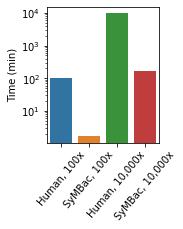

In [216]:
plt.figure(figsize=(2,2.5))
sns.barplot(data=times,x="index",y="time")
plt.yscale("log")
plt.xlabel("")
plt.ylabel("Time (min)")
plt.xticks(rotation=50)
plt.savefig("time_comparison.pdf")